# Mappeoppgave 2

#### Informasjon om oppgaven
Når du besvarer oppgaven, husk: 
- les oppgaveteksten nøye
- kommenter koden din
- sett navn på akser og lignende i figurene
- skriv hvor du har hentet kodesnutter fra, hvis du gjør det
- bruk engelske variabelnavn og vær konsistent med hvordan du bruker store og små bokstaver
- bruk mest mulig funksjoner for ting som kan repeteres
- En kort kode kan være en bra kode, så ikke gjør det mer komplisert enn det spørres om.

Du kan få full pott uten å svare på oppgaven som er markert "ekstrapoeng". Du blir likevel belønnet for denne (dvs. hvis du har noen feil og får 45 poeng totalt, så kan du få en høyere poengsum hvis du også har svart på "ekstrapoeng". 

#### Innlevering av oppgavene
Du skal levere begge mappene samtidig (det vil si denne oppgaven og mappe 1). Innleveringsfristen er 6 desember kl 13:00. 
Begge oppgavene skal leveres i github (som jupyter-fil) og wiseflow (som PDF). Bruk navnet  "SOK-1003-eksamen-2022-mappe2" på filene.
- For github: Husk å gi meg (brukernavn "okaars") tilgang til github-reposetoriet deres. Hvis dere har satt reposetoriet til public (anbefales ikke), må dere dele lenken til dette på ole.k.aars@uit.no
- For wiseflow: En person fra hver gruppe (for hver mappeoppgave), leverer inn. Ved innlevering kan du krysse av hvem som er på gruppen din 

Se generell informasjon om hvordan man leverer oppgaven <th><a href='https://uit-sok-1003-h22.github.io/semesteroppgave.html'>her</a>.
    
<b> NB!:</b> En person fra gruppa må <a href='https://docs.google.com/forms/d/e/1FAIpQLSeljUukzUU5d-VbxyM4C0x4WUplhUKBCU5wIpPZl_bP5kN71A/viewform?usp=sf_link'> fylle ut dette skjemaet </a>  for å melde om hvem som er på gruppa. Dere vil i etterkant motta en epost om tidspunkt for presentasjon. 
    
#### Presentasjon
Presentasjonen innebærer en kort gjennomgang av oppgaven (10-15 min) etterfulgt av kommentarer fra meg (10-15 min). Alle gruppemedlemmer skal bidra til presentasjonen. Det er anbefalt å laste opp besvarelsen på github forut for presentasjonen (helst to dager før) slik at jeg har mulighet til å lese gjennom. Dere vil ha mulighet til å endre besvarelsen etter presentasjonen, frem til endelig innlevering 6 desember.




In [109]:
#pakker som du kan få bruk for
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import display, clear_output
import sympy as sp 
from sympy.solvers import solve

### Oppgave 1 (10 poeng)

a) Vi skal spille et spill der vi kaster en terning 6 ganger. Lag en funksjon med "for-løkke" som printer alle terningene som har blitt kastet. Du kan bruke `np.random.randint()` til å lage tilfeldige tall

In [110]:
def terningkasta(kast):
    for i in range(kast):
        print(np.random.randint(1,7))
        
terningkasta(6) #Kaster terning 6 ganger

6
2
5
1
1
3


b) Juster den samme funksjonen slik at den lagrer tallene i en liste før den printer ut selve listen. Dere kan kalle denne listen for `lot_numbers`. Dere kan vurdere å bruke `append()` som del av funksjonen. 

In [111]:
def terningkastb(antall_kast):
    lot_numbers = [np.random.randint(1,7) for i in range(antall_kast)] #lager liste inne i listen. "List Comprehension"
    print(lot_numbers) #Looper like mange ganger som "kast" verdien.  

        
terningkastb(7) #Liste over terningkast

[2, 3, 5, 2, 2, 2, 6]


c) Juster den samme funksjonen slik at den har to argument. Disse argumentene er to terningverdier som du "tipper" blir kastet. Bruk `if`, `else` og `elif` til å generere vinnertall. Resultatet fra funksjonen skal printe ut ulike setninger avhengig av om man får 0, 1 eller 2 rette. Setningene velger du selv, men de skal inneholde tallene som du tippet, og tallene som ble trukket.  

In [112]:
def terningkastc(gjett1, gjett2, antall_kast = 2): #terning kast og våres gjettinger 1 og 2. 
    lot_numbers = [np.random.randint(1,7) for i in range(antall_kast)]   #list comprehension isteder for append
    rett1, rett2 = False, False  #Starter med å definere begge som false. må gjøres for å kunne forandres til true senere om gjettingen er rett.
    
    
    for i in lot_numbers: #i er alle tilfeldige tall i listen fra 1 til med ikke med 7
        if i == gjett1:
            rett1 = True
        if i == gjett2:
            rett2 = True
    if rett1 and rett2 == True:   #if går hvis begge er rett, ellers går den videre nedover.
        print(f'To rette gjett! Tallene {gjett1} og {gjett2} er i lista {lot_numbers}')          
    elif rett1 == True:           #elif brukes som if else om ikke if er rett, for å gå videre ned
        print(f'Ett rett gjett! Tallet {gjett1} er i lista {lot_numbers}, {gjett2} er ikke med') #sjekker om gjett 1 er rett
    elif rett2 == True:
        print(f'Ett rett gjett! Tallet {gjett2} er i lista {lot_numbers}, {gjett1} er ikke med') #sjekker om gjett 2 er rett
    else: #else kommando der den har sjekket om begge gjettene er "TRUE", eller om en av de er true og siden ingen er rett så er det
        print(f'Du gjettet {gjett1} og {gjett2}, ingen er i lista {lot_numbers}') #else kommandoen som kjører. 
        
terningkastc(3,5) #kan skrive inn hvor mange kast man også vil ha

#terningkastc(3,5,3) #her kaster vi 3 terninger

Du gjettet 3 og 5, ingen er i lista [1, 6]


### Oppgave 2 (10 poeng)
a) Du har nå begynt å spille lotto i stedet, og satser alt på ett vinnertall. Lag en while-løkke som printer ut tall helt til du har trukket riktig tall (som du definerer selv). For enkelthets skyld kan du begrense utfallsrommet av trekningene til mellom 0-30.

In [113]:
def lottoa(guess):
    if 0 <= guess <= 30 and int == type(guess): #sjekker om guess er fra 0 til og med 30, siden np.randomint går til og med 30 og ville loopet for alltid hvis tallet var over randomint. eller under
        loop = True #setter loop som true siden while loop kommer
        while loop: #må sette while loop til true siden om rette lottotall blir gjettet så blir loop false og den stopper.
            pick = np.random.randint(30)
            if pick == guess: 
                print(f'Winner! {guess} was right!')
                loop = False       #her blir den satt til false for at loopen skal slutte siden pick == guess da tallet blir gjettet.
            else:
                print(f'{pick} was picked') 
    else:
        print('Please guess up to 30, no float values') #tall utenfor 0-30 ble satt i kommandoen. se linje2. 
        
lottoa(5.2)

Please guess up to 30, no float values


b) Lag et plot av den while-løkken du nettopp lagde. Man blir belønnet om man; 
- bruker `scatter`; 
- lager plottet dynamisk (dvs at hver trekning vises hver for seg, og at x-aksen endrer seg etter en gitt verdi); 
- viser hvor når siste trekningen blir gjort (dvs at den vises kun når du har trukket vinnertallet).

Avhengig av hvordan du lager figuren din kan du får bruk for å importere pakkene `Ellipse`, `display`, `clear_output`.

It took 10 tries


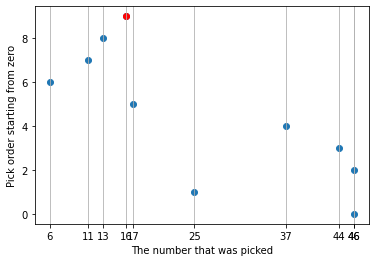

In [114]:
def lottob(guess, maxnumber):
    if 0 <= guess <= maxnumber:
        loop = True
        picklist = []
        while loop:
            pick = np.random.randint(maxnumber)
            if pick == guess:
                picklist.append(pick)
                loop = False
                ylist = [i for i in range(len(picklist))]
                scatterplot = plt.scatter(picklist, ylist)
                plt.scatter(pick, ylist[-1], color='red') #går på slutten av Ylisten for å hente siste verdi for rød dott
                plt.xlabel('The number that was picked')  #labels
                plt.ylabel('Pick order starting from zero')
                print(f"It took {len(picklist)} tries")  #fprint med lengden på listen for mengde forsøk
                if len(picklist) <= 50:    #setter inn grid for antall forsøk som er under 50 for bedre visualisering
                    plt.xticks(picklist)
                    plt.grid(axis='x')
                plt.show() #viser grid
                
            else:
                picklist.append(pick) 
    else:
        print(f'Please guess up to {maxnumber}')

lottob(16, 50)




#legg til clearoutput eclipse osv. få den til å displaye feil tall med markert feil. og til slutt rette tallet.

TypeError: 'AxesSubplot' object is not callable

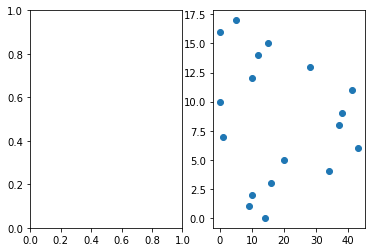

In [135]:

def lottob(guess, maxnumber):
    if 0 <= guess <= maxnumber:
        loop = True
        picklist = []
        while loop:
            pick = np.random.randint(maxnumber)
            if pick == guess:
                picklist.append(pick)
                loop = False
                ylist = [i for i in range(len(picklist))]
                scatterplot = plt.scatter(picklist, ylist)
                scatter(pick, ylist[-1], color='red') #går på slutten av Ylisten for å hente siste verdi for rød dott
                plt.xlabel('The number that was picked')  #labels
                plt.ylabel('Pick order starting from zero')
                print(f"It took {len(picklist)} tries")  #fprint med lengden på listen for mengde forsøk
                if len(picklist) <= 50:    #setter inn grid for antall forsøk som er under 50 for bedre visualisering
                    plt.xticks(picklist)
                    plt.grid(axis='x')
                plt.show() #viser grid
                
            else:
                picklist.append(pick) 
    else:
        print(f'Please guess up to {maxnumber}')


def lottoc(guess, maxnumber):
    if 0 <= guess <= maxnumber:
        loop = True
        picklist = []
        while loop:
            pick = np.random.randint(maxnumber)
            if pick == guess:
                picklist.append(pick)
                picklist.sort()
                loop = False
                ylist = [i for i in range(picklist[-1])]
                histplot = plt.hist(picklist, ylist)
                plt.xlabel('The number that was picked')
                plt.ylabel('Number of times picked')
                plt.show()
            else:
                picklist.append(pick)
    else:
        print(f'Please guess up to {maxnumber}')
        
        
fig,(ax1, ax2) = plt.subplots(1, 2)

lottob(5, 50)
lottoc(5, 50)
ax1.plot(scatter(pick, ylist[-1], color='red'))
ax2.plot(histplot(picklist, ylist))
fig





#vi må fikse noe her
#good luck harald

c) Ekstrapoeng: gjør det samme som i (b), men lag et histogram som vises ved siden av. Dette histogrammet skal vise hvor mange ganger de ulike tallene ble trekt. Bruk `plt.hist` til dette. Husk at du må definere figur og akseobjekt først.  

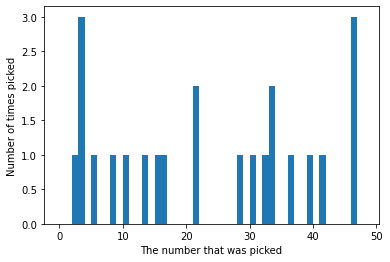

In [116]:
def lottoc(guess, maxnumber):
    if 0 <= guess <= maxnumber:
        loop = True
        picklist = []
        while loop:
            pick = np.random.randint(maxnumber)
            if pick == guess:
                picklist.append(pick)
                picklist.sort()
                loop = False
                ylist = [i for i in range(picklist[-1])]
                histplot = plt.hist(picklist, ylist)
                plt.xlabel('The number that was picked')
                plt.ylabel('Number of times picked')
                plt.show()
            else:
                picklist.append(pick)
    else:
        print(f'Please guess up to {maxnumber}')

lottoc(5, 50)   

### Oppgave 3 (20 poeng)

En bedrift produserer biler. Produktfunksjonen til bedriften defineres slik  $f(L, a, R) = 2RL^{a}$, hvor:
- `L` er arbeidskraft, 
- `a` er produktiviteten til arbeiderne og 
- `R` er antall robotmaskiner

a) Lag en formel for produktfunksjonen til bedriften og plot den grafisk med ulike verdier av `L` på x-aksen. Anta `a=0.6` og `R=2`

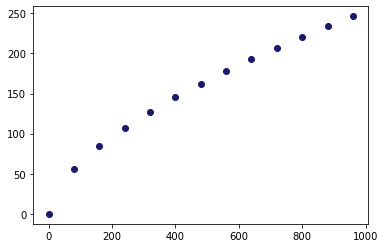

In [117]:
L = np.arange(0,1000,80)            #lager ulike verdier til L(arbeidskraft)
a=0.6                               #legger inn verdi for a
R=2                                 #legger inn verdi for R

def f(L,a,R):                       #definerer produktfunksjon
    return 2*R*L**a

for i in L:                                            #lager for loop for de ulike L verdiene
    plt.scatter(i, f(i,a,R), color='midnightblue', marker='o')  #plotter grafen
    


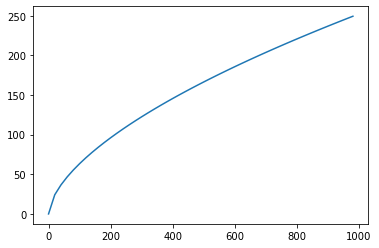

In [118]:
L = np.arange(0,1000,20)            #lager ulike verdier til L(arbeidskraft)
a=0.6                               #legger inn verdi for a
R=2                                 #legger inn verdi for R

ansatte = []
biler = []
for i in L:                                        
    ansatte.append(i)
    
    biler.append(f(i,a,R))
    
plt.plot(ansatte, biler)
plt.show() #fjerner utsagnet om plassen i minnet plotten er lagret på

b) anta at profittfunksjonen til denne bedriften er ${profit = f(L, a, R)p-wL-cR-K}$, hvor 
- `w` er månedslønnen til arbeiderne, 
- `c` er kostnaden for robotmaskinene 
- `K` er faste kostnader
- `p` er utsalgsprisen på bilene. 

Anta `a=0.6`,`R=6`, `p=300 000`, `w=100 000`, `c= 1 000 000` og `K=90 000 000`. Plot profittfunksjonen figurativt for antall arbeidere (`L`) mellom 0 og 10 000. Vis profitten i millioner (dvs at du må dele på 1 000 000)

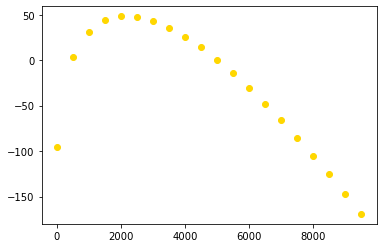

In [272]:
L = np.arange(0,10000, 500)                 #nye verdier for L

a=0.6
R=6                                         #legger inn de nye verdiene
p=300000
w=100000
c=1000000
K=90000000

def profittfunksjon(L,a,R,p,w,c,K):         #definerer profittfunksjon og deler på 1 million
    return (f(L,a,R)*p-w*L-c*R-K)/1000000   

for i in L:                                 #ny loop for L, plotter profittfunksjon
    plt.plot(i, profittfunksjon(i,a,R,p,w,c,K), 'gold', marker='o')  #skriv inn color='gold' for gudsskyld


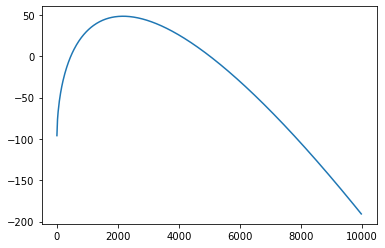

In [120]:
L = np.arange(0,10000,20)            #lager ulike verdier til L(arbeidskraft)


ansatte = []
profitt = []
for i in L:                                        
    ansatte.append(i)
    
    profitt.append(profittfunksjon(i,a,R,p,w,c,K))
    
plt.plot(ansatte, profitt)
plt.show() #fjerner utsagnet om plassen i minnet plotten er lagret på

c) Plot profitttfunksjonen for antall robostmaskiner `R=[3, 6, 9]` i samme plot (dvs at tre profittfunksjoner vises sammen). Bruk av "for loops" for å gjøre dette belønnes

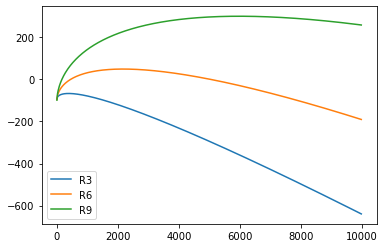

In [121]:
R=[3,6,9]                  #Lager liste for R

for i in R:                #for loop for R listen, plotter
    plt.plot(L, profittfunksjon(L,a,i,p,w,c,K), label='R{}'.format(i))
    #plt.plot(L, profittfunksjon(L,a,i,p,w,c,K), label=f'R{i}') #bruk den her istedet
plt.legend()

d) finn profittmaksimum og optimal antall arbeidere ved hjelp av derivasjon med samme forutsetninger som i (1b). Bruk `sympy`-pakken til dette 

In [75]:


L,a,R,p,w,c,K=sp.symbols("L a R p w c K")


def profittfunksjon(L,a,R,p,w,c,K):
    return (f(L,a,R)*p-w*L-c*R-K)

d_profitt=sp.diff(profittfunksjon(L,a,R,p,w,c,K), L)

d_profitt #vi deriverer med hensyn på L

-w + 2*L**a*R*a*p/L

In [76]:
foc=sp.Eq(d_profitt,0)
foc #vi lager en equation og setter den lik 0

Eq(-w + 2*L**a*R*a*p/L, 0)

In [77]:
max_employees=sp.solve(foc,L)[0]
sp.Eq(max_employees, L)

Eq((2*R*a*p/w)**(-1/(a - 1)), L)

In [78]:
max_profit=profittfunksjon(max_employees,a,R,p,w,c,K)
max_profit

-K - R*c + 2*R*p*((2*R*a*p/w)**(-1/(a - 1)))**a - w/(2*R*a*p/w)**(1/(a - 1))

In [79]:
values={a:0.6,R:6,p:300000,w:100000, c:1000000, K:90000000} #lager dictionary for verdiene


In [80]:
max_amount_employees = max_employees.subs(values) #Her ser vi at maksimal mengde ansatte er 2168 personer
plt_max_employees = float(max_amount_employees)
print(max_amount_employees)

2168.37493200784


In [81]:
values[L]=max_employees.subs(values) #legger til L i dictionary med verdien.
print(values)

{a: 0.6, R: 6, p: 300000, w: 100000, c: 1000000, K: 90000000, L: 2168.37493200784}


In [82]:
max_profitt_num=(profittfunksjon(L,a,R,p,w,c,K).subs(values))
plt_max_profitt = float(max_profitt_num)

print(max_profitt_num)

48558328.8005225


In [83]:
Her legger vi til den eksempel 15 from IPython.display import Markdown delen i 5 sympy. 

SyntaxError: invalid syntax (64910457.py, line 1)

e) vis figurativt med bruk av `fill_between` arealet hvor man taper penger (i rødt) og hvor man tjener penger (i grønt). Marker også profittmaksimum og antall arbeidere i profittmaksimum - gjerne ved bruk av `vlines`. Bruk ellers samme forutsetninger for argumentene som i oppgave (1b)

In [ ]:
print(profittfunksjon(L,a,R,p,w,c,K).subs(values))

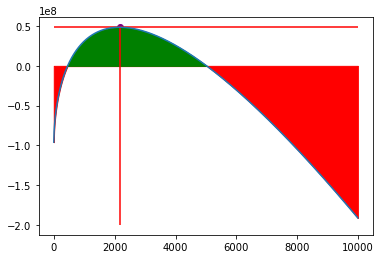

In [84]:
stepsize = 10
ansatte = np.arange(0,10000, stepsize)                 #nye verdier for L

a=0.6
R=6                                         #legger inn de nye verdiene
p=300000
w=100000
c=1000000
K=90000000



m=-1
y_value = [] #få skiten bort(kanskje)
x_value = [] #få skiten bort(kanskje)
tapsliste = []
profittliste = []

tapslistex = []
profittlistex = []

for i in ansatte:
    m +=1 #indekserer ansatte etter M for å alltid få rett posisjon
    
    funksjon=profittfunksjon(ansatte,a,R,p,w,c,K)
    
    y_value.append(funksjon[m])    #fjern trengs ikke(kanskje)
    x_value.append(ansatte[m])     #fjern trengs ikke(kanskje)

    
    
    if funksjon[m] <= 0:
        tapsliste.append(funksjon[m])              #hvis profitten er mindre enn null så går det i tapsliste. indeksert med M
        tapslistex.append(m*stepsize)
    else:
        profittliste.append(funksjon[m])           #hvis profitten er større enn null så går det i profittliste. indeksert med M
        profittlistex.append(m*stepsize)
    


    




plt.vlines(plt_max_employees, -2e8, plt_max_profitt, color="red")
plt.hlines(plt_max_profitt, 0, 10000, color="red")
plt.scatter(plt_max_employees, plt_max_profitt, color="purple")     #fiks denne du harald. den e off center

                         

plt.fill_between(tapslistex, tapsliste, 0, color="red")                           
plt.fill_between(profittlistex, profittliste, 0, color="green")   #fiks farger, ser jævlig ut

plt.plot(x_value, y_value) #fjern trengs ikke(kanskje)

plt.show()




f) Plot nå to figurer sammen der du viser hva optimal antall arbeidere gir i profitt (slik som i (2e)) og produksjon av antall biler (som du får fra produktfunksjonen). Marker optimum med vlines. Ha grafen med profittfunksjonen over grafen med produktfunksjonen. Du kan bruke `fig, (ax1, ax2) = plt.subplots(2)` når du skal gjøre dette. <br>

<b> Hint: </b> Du kan finne antall biler som blir produsert ved å bruke antall arbeidere i profittmaksimum, i produktfunksjonen.


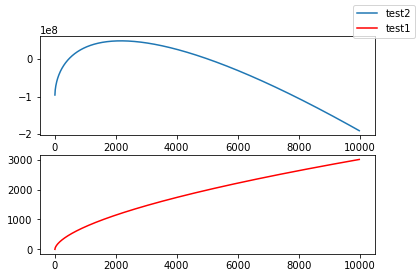

In [108]:
a=0.6
R=6   


stepsize = 10
ansatte = np.arange(0,10000, stepsize)                 #nye verdier for 


def f(ansatte,a,R):                       #definerer produktfunksjon
    return 2*R*ansatte**a



ansatte1 = []
biler = []
for i in ansatte:                                        
    ansatte1.append(i)
    
    biler.append(f(i,a,R))

    
    
fig, (ax2, ax1) = plt.subplots(2)
ax1.plot(ansatte1, biler, label="test1", color="red")
ax2.plot(x_value, y_value, label="test2")

fig.legend()
plt.show()


#usikker på denne oppgaven, vet ikke helt hva oppgaven spør om




### Oppgave 4 (10 poeng)
I denne oppgaven skal vi hente ut et datasett fra eurostat på investeringer i hosholdningen. Bruk koden under til å hente ut dataene.
<br><b>NB!:</b> Husk at dere må ha innstallert pakken `eurostat`. Dette gjør dere med å åpne "Terminal" og kjøre  `pip install eurostat`.

In [291]:
import eurostat

inv_data = eurostat.get_data_df('tec00098')


a) Bytt navn på kolonnen "geo\\time" til "country" ved bruk av en av kodene under. Fjern så alle kolonner utenom "country" og alle årstallene. 
<br> <b>NB!:</b> Noen vil få en ekstra første kolonne som heter "freq" eller noe annet. Da må dere bruke versjon 2 av koden under. 

In [ ]:
#inv_data.columns = ['unit',   'sector',  'na_item', 'country'] + list(range(2010, 2022)) #v1


In [292]:
inv_data.columns = ['freq', 'unit',   'sector',  'na_item', 'country'] + list(range(2010, 2022)) #v2 


In [293]:
inv_data = inv_data.iloc[:, 4:]
inv_data

,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,8.44,8.60,8.47,8.58,8.30,8.36,8.29,8.69,8.81,9.03,9.21,9.99
1,BE,9.82,9.45,9.37,9.03,9.45,9.31,9.33,9.28,9.35,9.78,9.15,9.94
2,CH,6.83,6.48,6.29,6.31,6.20,6.26,6.13,6.07,6.06,5.69,5.42,NaN
3,CY,13.72,10.73,8.74,7.53,7.15,6.69,8.02,8.97,11.30,12.98,13.12,13.26
4,CZ,11.14,9.82,8.74,8.77,8.88,8.84,9.18,7.86,9.00,9.45,9.34,9.24
5,DE,8.72,9.51,9.61,9.56,9.65,9.32,9.62,9.48,9.68,9.71,9.95,10.55
6,DK,8.50,8.51,7.87,7.35,7.60,7.50,7.46,8.10,8.33,8.57,8.69,9.24
7,EA19,9.30,9.21,8.80,8.37,8.24,8.09,8.35,8.52,8.71,8.77,8.53,9.51
8,EE,6.14,6.47,6.84,7.52,7.79,7.94,8.52,8.99,8.68,9.26,9.94,10.04
9,EL,9.12,8.54,6.28,4.90,3.16,2.72,2.75,2.69,2.44,2.59,2.97,3.40


b) fjern radene med nan verdi. Sett deretter indeksen til "country". <br> <b> Hint: </b> En metode er å bruke `isna()` og `any()` over radaksene (dvs. `axis=1`)

In [304]:
#nan = inv_data[].isna()
#inv_data1 = inv_data[nan==False]
#inv_data1


#fiks harald din pikk

SyntaxError: invalid syntax (2411240625.py, line 1)

c) Lag et nytt datasett hvor du kun har med de nordiske landene (dvs. "NO", "SE", "DK", "FI"). Det kan være nyttig å bruke `isin` til dette. Bytt så om på kolonner og rader ved hjelp av `transpose`. 

In [225]:
Nordic = inv_data['country'].isin(["NO", "SE", "DK", "FI"]) #setter nordiske land til True
Nordic = inv_data[Nordic==True] #henter bare ut nordiske land
Nordic = Nordic.set_index('country') #setter indeks til country

Nordic #printer nordic 

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,
DK,8.50,8.51,7.87,7.35,7.60,7.50,7.46,8.10,8.33,8.57,8.69,9.24
FI,11.66,12.18,12.12,11.49,10.88,10.49,11.57,12.09,12.50,12.25,11.91,12.50
NO,9.71,10.98,11.74,12.32,11.82,11.35,12.34,13.02,12.22,11.89,11.29,11.11
SE,5.86,5.48,4.51,4.61,4.69,5.69,6.15,6.77,6.24,5.88,6.48,6.84


In [226]:
Nordic = Nordic.transpose() #bytter om på rader og kolonner
Nordic   #bør vi bytte navn på kolonnen fra country til year? vil det potentielt gi utslag på karakter? #harald fiks

country,DK,FI,NO,SE
2010,8.50,11.66,9.71,5.86
2011,8.51,12.18,10.98,5.48
2012,7.87,12.12,11.74,4.51
2013,7.35,11.49,12.32,4.61
2014,7.60,10.88,11.82,4.69
2015,7.50,10.49,11.35,5.69
2016,7.46,11.57,12.34,6.15
2017,8.10,12.09,13.02,6.77
2018,8.33,12.50,12.22,6.24
2019,8.57,12.25,11.89,5.88


d) Lag en ny kolonne som du kaller "mean". Denne skal være gjennomsnittet av alle de nordiske landene for hvert av årene (dvs at du må ta gjennomsnittet over radene). Plot så dette og kall y-aksen for "investering"

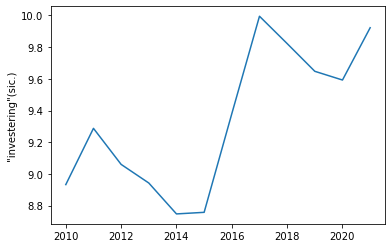

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
2010    8.9325
2011    9.2875
2012    9.0600
2013    8.9425
2014    8.7475
2015    8.7575
2016    9.3800
2017    9.9950
2018    9.8225
2019    9.6475
2020    9.5925
2021    9.9225
Name: Mean, dtype: float64


In [282]:
Nordic["Mean"] = Nordic.mean(axis=1)




Nordic

xpath = np.arange(2010, 2022)
plt.plot(xpath, Nordic["Mean"])
#print(Nordic["Mean"])
#print(xpath[0])
plt.ylabel('"investering"(sic.)')  #sic betyr det står virkelig sånn 
plt.show()

print(xpath)
print(Nordic["Mean"])